In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [90]:
df=pd.read_csv("NetflixOriginals.csv")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [91]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [92]:
# We have no missing values..

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [95]:
# Documentary, Dram & Comdey movies are the most produced over the years.

In [109]:
df["Premiere"] = pd.to_datetime(df.Premiere)
df.Premiere

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

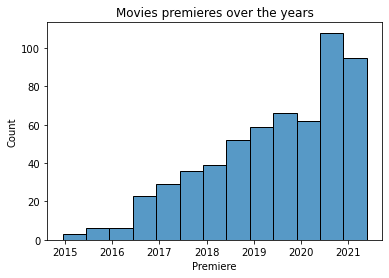

In [107]:
plt.title("Movies premieres over the years")
sns.histplot(data=df, x="Premiere")
plt.show()

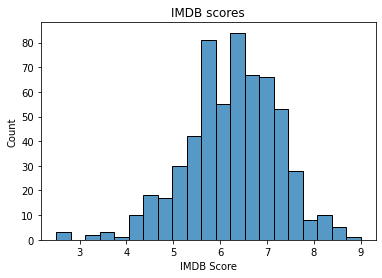

In [97]:
plt.title("IMDB scores")
sns.histplot(data=df, x="IMDB Score")
plt.show()

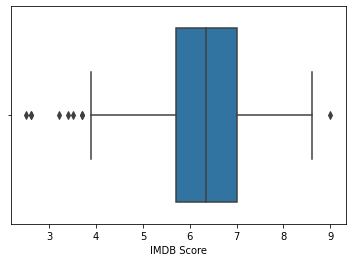

In [110]:
ax = sns.boxplot(x=df["IMDB Score"])

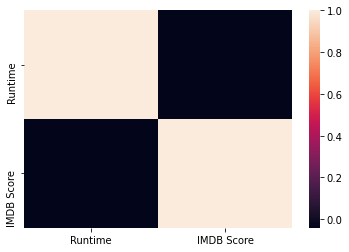

In [98]:
sns.heatmap(df.corr());

In [101]:
#there is no significant relationship between runtime and IMDB score.

In [111]:
df["Genre"].value_counts()

Documentary         159
Drama                77
Comedy               49
Romantic comedy      39
Thriller             33
                   ... 
Anime / Short         1
Christmas comedy      1
Heist                 1
Horror anthology      1
Superhero-Comedy      1
Name: Genre, Length: 115, dtype: int64

In [102]:
genre = df.Genre.value_counts().nlargest(20)
genre

Documentary               159
Drama                      77
Comedy                     49
Romantic comedy            39
Thriller                   33
Comedy-drama               14
Crime drama                11
Biopic                      9
Horror                      9
Action                      7
Concert Film                6
Romance                     6
Aftershow / Interview       6
Action comedy               5
Animation                   5
Romantic drama              5
Animation / Short           4
Variety show                4
Science fiction             4
Psychological thriller      4
Name: Genre, dtype: int64

In [103]:
import plotly.express as px
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

In [112]:
df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
Turkish                         5
German                          5
Polish                          3
Dutch                           3
Marathi                         3
English/Mandarin                2
English/Hindi                   2
English/Japanese                2
Filipino                        2
Thai                            2
Spanish/English                 1
English/Korean                  1
Malay                           1
English/Swedish                 1
Swedish                         1
Georgian                        1
Tamil                           1
English/Taiwanese/Mandarin      1
English/Akan                    1
Khmer/English/

In [104]:
top_20_lang = df.Language.value_counts().nlargest(20)
top_20_lang

English             401
Hindi                33
Spanish              31
French               20
Italian              14
Portuguese           12
Indonesian            9
Korean                6
Japanese              6
English/Spanish       5
Turkish               5
German                5
Polish                3
Dutch                 3
Marathi               3
English/Mandarin      2
English/Hindi         2
English/Japanese      2
Filipino              2
Thai                  2
Name: Language, dtype: int64

In [105]:
fig = px.bar(data_frame=top_20_lang, x=top_20_lang.index, y=top_20_lang.values, labels={"y":"Count", "index":"Language"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

In [117]:
# Linear Regression algorithm...

x=df["Genre"]
y=df["IMDB Score"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

fig, ax = plt.subplots(figsize=(7, 3.5))
ax.plot(x,model.predict(x), color='k', label='Regression model')
ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
plt.title('regression plot')
plt.xlabel('Premiere')
plt.ylabel('IMDB Score')
plt.show()

ValueError: could not convert string to float: 'Documentary'